# Introduction
This notebook looks at the Titanic passenger dataset and looks for factors that influence the survival rate for passengers. The data is first cleaned and null rows and outliers are dealt with before feature analysis. 

The notebook solves the following tasks:
* Take a look at the data and clean it. Take a few words to justify your decisions and other reasonable alternatives.
* How does various factors impact survival: age, sex, social class etc?
* What are some potential correlations in the dataset between these factors? How can we account for them?

# Table Of Contents:

## 1.   [Loading the dataset](#first)
## 2.   [Cleaning the data](#second)
  *   [Sex](#second-one)
  *   [Age](#second-two)
  *   [Fare](#second-three)
  *   [Siblings/Parents Aboard](#second-four)
  *   [Passenger Class](#second-five)
  *   [Data cleaning summary](#second-six)

## 3.[Feature analysis](#third) 

  *   [Passenger survival rate analysis](#third-one)
  *   [Sex impact on survivability](#third-two)
  *   [Passenger class influence on survivability](#third-three)
  *   [Correlation between age and survivability](#third-four)
  *   [Correlation between fare and survivability](#third-five)
  *   [Children/Parents aboard](#third-six)
  *   [Correlation between features](#third-seven)

## 4. [Conclusion](#fourth)


# Loading the dataset <a class='anchor' id='first'></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./titanic.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    object 
 2   Name                     887 non-null    object 
 3   Sex                      874 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


# Cleaning the data <a class='anchor' id='second'></a>


Checking for null values


In [ ]:
df.isnull().sum()

Survived                    0
Pclass                      0
Name                        0
Sex                        13
Age                         0
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                        0
dtype: int64

Checking for duplicated values in the dataset

In [ ]:
df.duplicated().value_counts()

False    887
dtype: int64

# Sex <a class='anchor' id='second-one'></a>

There are 13 values in the Sex column that are null, we can use the honorifics from the name column to determine the sex of the passenger

In [ ]:
for i, row in df.iterrows():
  row_sex = df.at[i,'Sex']
  if row_sex != 'male' and row_sex != 'female':
    new_name = df.at[i,'Name']
    prefix = new_name.split('.')[0]
    if prefix == 'Mr':
      df.at[i,'Sex'] = 'male'
    else:
      df.at[i,'Sex'] = 'female'


The prefix variable above returns the honorifics used in the name column. The variable returned either 'Mr' or 'Miss' or 'Mrs' so the if condition then checks if the honorific is 'Mr' to assign the passenger as male, else female. 

Alternative solutions would be to remove the null value rows or use the mean to assign them to a value but these are not viable solutions since the name column can help us identify the sex of the passenger. 

# Age <a class='anchor' id='second-two'></a>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


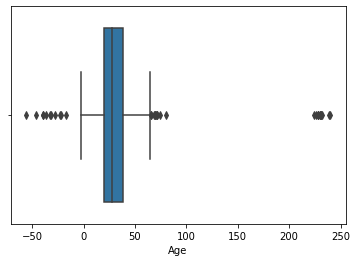

In [ ]:
sns.boxplot(df['Age'])

Since the age has some outliers, values below 0 and above 100. We can reshape the dataframe to exclude these values.

In [ ]:
df = df[(df.Age > 0) & (df.Age < 101)]

# Fare <a class='anchor' id='second-three'></a>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc456693dd0>]],
      dtype=object)

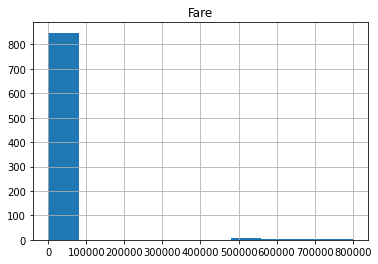

In [ ]:
df.hist(column='Fare')

The fare column shows some outliers where some passengers are paying upwards of 500,000 for a ticket so these values are removed from the dataset. 

In [ ]:
df = df[df.Fare < 1000]

# Siblings/ Parents Aboard <a class='anchor' id='second-four'></a>

Looking at the dataset there are values for the columns siblings aboard and parents aboard which are negative. These values are not used for the analysis and are dropped from the data frame. 

In [ ]:
df = df[(df['Parents/Children Aboard']>=0) & (df['Siblings/Spouses Aboard']>=0)]

# Passenger class <a class='anchor' id='second-five'></a>

In [ ]:
df['Pclass'].describe()

count          825
unique          22
top       3-pclass
freq           242
Name: Pclass, dtype: object

Since there are many variations for the passenger class like '3-pclass', '3 pclass' and '3 pla' all indicating the passenger belongs to passenger class 3, we replace the values in the column with the first character in the string.

In [ ]:
df['Pclass'] = df['Pclass'].str[0]

In [ ]:
df['Pclass'].value_counts()

3    451
1    200
2    174
Name: Pclass, dtype: int64

# Data cleaning summary:<a class='anchor' id='second-six'></a>


*   Replaced empty values in the sex column based on the honorifics used.
*   Checked for any duplicates in the dataset.
*   Dropped outliers from the dataset that appeared in the age, fare, siblings aboard and parents aboard columns.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 825 non-null    int64  
 1   Pclass                   825 non-null    object 
 2   Name                     825 non-null    object 
 3   Sex                      825 non-null    object 
 4   Age                      825 non-null    float64
 5   Siblings/Spouses Aboard  825 non-null    int64  
 6   Parents/Children Aboard  825 non-null    int64  
 7   Fare                     825 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 58.0+ KB


After cleaning the dataset, the entries have reduced to 825 rows but there are no more outliers in the dataset and all values are non-null.

# Feature analysis <a class='anchor' id='third'></a>

# Passenger survival rate analysis <a class='anchor' id='third-one'></a>

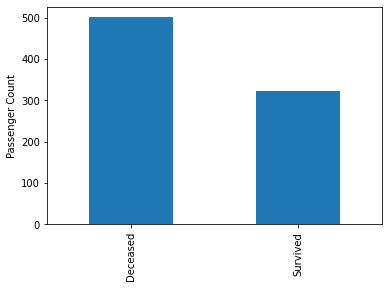

In [ ]:
survival = df['Survived'].value_counts().plot(kind='bar')
survival.set_xticklabels(['Deceased', 'Survived'])
survival.set(ylabel = 'Passenger Count')
plt.show()

In [ ]:
df['Survived'].value_counts() / df['Survived'].value_counts().sum()

0    0.607273
1    0.392727
Name: Survived, dtype: float64

Only **39%** of passengers who boarded the Titanic survived.

# Sex impact on survivability <a class='anchor' id='third-two'></a>

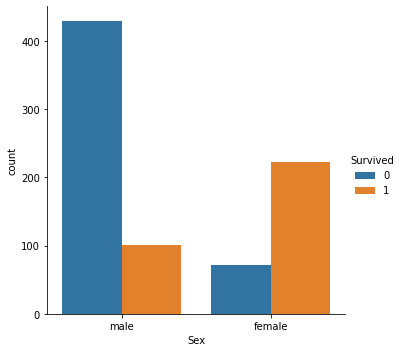

In [ ]:
sns.catplot(x='Sex', hue='Survived', kind='count',data=df)
# 0 represents deceased and 1 represents survived in the figure.

The graph above shows that there were more men than women on board.

In [ ]:
# Correlation between men and women and their survival rate 
df['Sex'].str.get_dummies().corrwith(df['Survived']/df['Survived'].max())

female    0.554865
male     -0.554865
dtype: float64

The correlation above tells us that there is a positive relationship between women on board and surviving the Titanic and there is a moderately negative relationship between men on board and surviving the crash.

In [ ]:
round(df[['Sex','Survived']].groupby(['Sex']).mean()*100,1)

,Survived
Sex,
female,75.6
male,19.1


Women had a **75.6%** chance of survivability as compared to men who had a **19.1%** to survive on the Titanic. Correlation also confirms that women are more likely to survive than men. 

# Passenger class influence on survivability <a class='anchor' id='third-three'></a>

Passengers who travelled in first class are **more likely** to survive than passengers in the second class and third class. 

In [ ]:
round(df[['Pclass','Survived']].groupby(['Pclass']).mean()*100,1)

,Survived
Pclass,
1,65.0
2,46.0
3,25.3


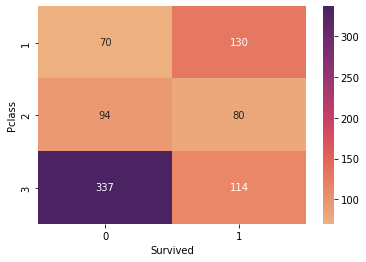

In [ ]:
group = df.groupby(['Pclass','Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt='d', cmap='flare')

# In the survived column, 0 represents deceased and 1 represents survived.

In [ ]:
round(df[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean()*100,1)

Survived
Pclass Sex             
1      female      97.8
       male        38.2
2      female      91.5
       male        14.6
3      female      52.2
       male        13.9

For men, travelling in second class or third class shows almost the same survivability rate while for women, travelling in the first or second class shows similar survivability rates. 

# Correlation between age and survivability <a class='anchor' id='third-four'></a>

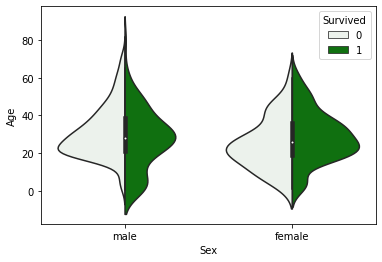

In [ ]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split = True, color='Green')

* The graph aboves tells us that the survival rate is better for women for the age range of 20 to 50.
* Most male passengers who died on the Titanic were around 20 years old and there were fewer male survivors as the age increased.

# Correlation between fare and survivability <a class='anchor' id='third-five'></a>

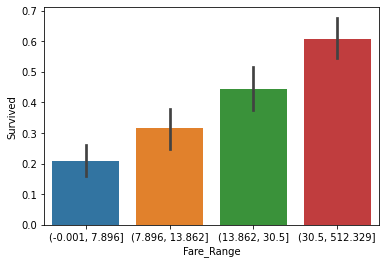

In [ ]:
df['Fare_Range'] = pd.qcut(df['Fare'],4)
sns.barplot(x='Fare_Range', y='Survived', data=df)


From the graph above, we can see as the fare increases, there is a steady increase in survivability for the passenger. A higher fare could also imply that the passenger is more likely to be in the higher passenger class which correlate to a better survival rate. 

# Children/Parents Aboard<a class='anchor' id='third-six'></a>

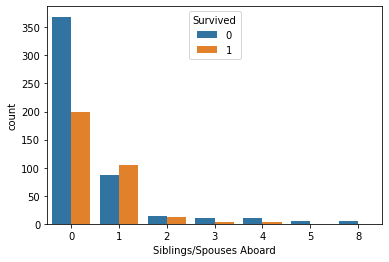

In [ ]:
sns.countplot(x='Siblings/Spouses Aboard', hue='Survived', data=df)

This graph above tells us that most passengers on board travelled alone.

In [ ]:
round(df[['Siblings/Spouses Aboard','Survived']].groupby(['Siblings/Spouses Aboard']).mean()*100,1)

,Survived
Siblings/Spouses Aboard,
0,35.1
1,54.5
2,48.1
3,28.6
4,21.4
5,0.0
8,0.0


We also see a similar trend when looking at the column 'Parents/Children Aboard'

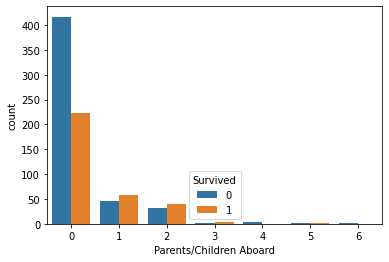

In [ ]:
sns.countplot(x='Parents/Children Aboard', hue='Survived', data=df)

In [ ]:
round(df[['Parents/Children Aboard','Survived']].groupby(['Parents/Children Aboard']).mean()*100,1)

,Survived
Parents/Children Aboard,
0,34.8
1,56.3
2,54.9
3,60.0
4,0.0
5,50.0
6,0.0


From the graphs above we notice that most people on board the Titanic travelled alone and we can see similar survival rates for passengers with up to 2 family members. 

# Correlation between features <a class='anchor' id='third-seven'></a>

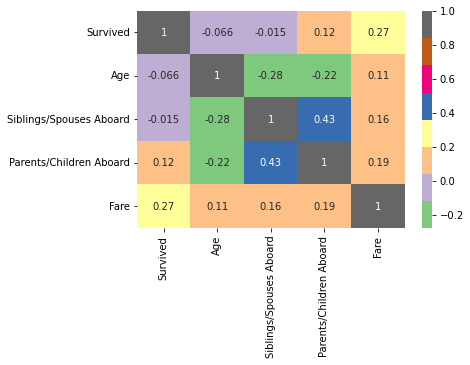

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cbar= True, cmap='Accent')

Takeways from the correlation matrix:
*   Siblings/Spouses aboard  and Parents/Children aborad have a high positive correlation, so passnegers who aren't travelling alone are most likely travelling with their family. 
*   Fare has a positive impact on survival, as the fare increases, the passengers have a greater chance for survival. 



# Conclusion <a class='anchor' id='fourth'></a>

Based on the analysis, the insights that I have found are:

There were more men on board the Titanic than women, that's why the overall survival rate is lower than the female survival rate.

**Age**
* Female passengers had the best chance of survival between the ages of 20-50.
* Male passengers had a lower survival rate the older they were.

**Sex and passenger class**
*   Female passengers, especially those in first class or second class were the most likely to survive the crash.
*   Male passengers had an almost identical survival rate whether they travelled in second class or third class.

**Fare**
*   As the fare increased, the passenger was more likely to survive.

**Parents/Children Aboard and Siblings/Spouses Aboard**
* Passengers had a better survival rate if they were travelling as a family compared to travelling alone.
  



